In [3]:
#Step 1: importing dependencies
tf.enable_eager_execution()
import numpy as np
import tensorflow as tf
import pandas as pd
import math
import matplotlib.pylab as plt
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [4]:
#Load data

mnist_dataset, metadata = tfds.load(name="mnist", as_supervised=True, with_info=True)

train_dataset, test_dataset = mnist_dataset["train"], mnist_dataset["test"]

train_dataset


<DatasetV1Adapter shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>

In [5]:
class_names = ["zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten"]

In [6]:
#checking number of trainign and testing samples:
num_train_Samples = metadata.splits["train"].num_examples
num_test_Samples = metadata.splits["test"].num_examples
print("Number of training sample is: {}". format( num_train_Samples))
print("Number of testing sample is: {}".format( num_test_Samples))

Number of training sample is: 60000
Number of testing sample is: 10000


In [7]:
#Now let normalize our data from 0-255 to 0-1 so that our image can perform well
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

In [26]:
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

test_dataset

<DatasetV1Adapter shapes: ((?, 28, 28, 1), (?,)), types: (tf.float32, tf.int64)>

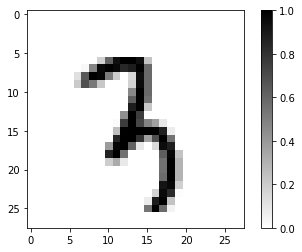

In [9]:
# Take a single image, and remove the color dimension by reshaping
for image, label in train_dataset.take(1):
    break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

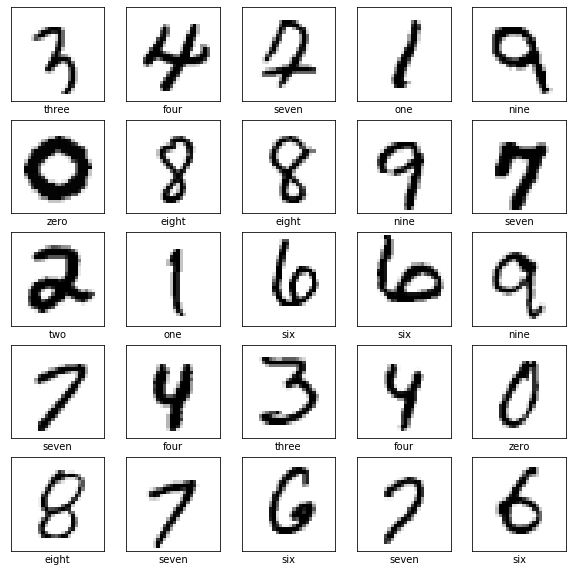

In [10]:
#take 25 digits and explore how them look with their names below.

plt.figure(figsize=(10,10))
i = 0
for image, label in train_dataset.take(25):
    image = image.numpy().reshape((28,28))
    #Subplot takes nrows, ncols, index
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [11]:
#Building a model

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(28, (3,3), activation='relu', input_shape=(28,28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(218, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    
])

In [12]:
model.compile(optimizer="Adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_Samples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

#Training the model
training = model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_Samples/BATCH_SIZE))

Epoch 1/5


 593/1875 [========>.....................] - ETA: 3:30:50 - loss: 2.2714 - acc: 0.18 - ETA: 53:07 - loss: 2.1750 - acc: 0.2188 - ETA: 35:39 - loss: 2.0791 - acc: 0.26 - ETA: 23:55 - loss: 1.9122 - acc: 0.37 - ETA: 18:05 - loss: 1.7491 - acc: 0.45 - ETA: 14:34 - loss: 1.6368 - acc: 0.48 - ETA: 12:13 - loss: 1.5236 - acc: 0.51 - ETA: 10:33 - loss: 1.4271 - acc: 0.55 - ETA: 9:17 - loss: 1.3462 - acc: 0.5755 - ETA: 8:19 - loss: 1.2702 - acc: 0.601 - ETA: 7:32 - loss: 1.1916 - acc: 0.628 - ETA: 6:53 - loss: 1.1411 - acc: 0.642 - ETA: 6:21 - loss: 1.0822 - acc: 0.661 - ETA: 5:54 - loss: 1.0487 - acc: 0.674 - ETA: 5:31 - loss: 1.0120 - acc: 0.686 - ETA: 5:11 - loss: 0.9774 - acc: 0.698 - ETA: 4:53 - loss: 0.9509 - acc: 0.707 - ETA: 4:38 - loss: 0.9238 - acc: 0.715 - ETA: 4:24 - loss: 0.9045 - acc: 0.722 - ETA: 4:12 - loss: 0.8829 - acc: 0.731 - ETA: 4:01 - loss: 0.8577 - acc: 0.740 - ETA: 3:51 - loss: 0.8419 - acc: 0.744 - ETA: 3:41 - loss: 0.8241 - acc: 0.749 - ETA: 3:33 - loss: 0.8018 - acc

1606/1875 [========================>.....] - ETA: 21s - loss: 0.2017 - acc: 0.93 - ETA: 21s - loss: 0.2016 - acc: 0.93 - ETA: 21s - loss: 0.2014 - acc: 0.93 - ETA: 21s - loss: 0.2012 - acc: 0.93 - ETA: 21s - loss: 0.2010 - acc: 0.93 - ETA: 21s - loss: 0.2008 - acc: 0.93 - ETA: 21s - loss: 0.2007 - acc: 0.94 - ETA: 21s - loss: 0.2005 - acc: 0.94 - ETA: 21s - loss: 0.2003 - acc: 0.94 - ETA: 21s - loss: 0.2001 - acc: 0.94 - ETA: 20s - loss: 0.1999 - acc: 0.94 - ETA: 20s - loss: 0.1996 - acc: 0.94 - ETA: 20s - loss: 0.1993 - acc: 0.94 - ETA: 20s - loss: 0.1993 - acc: 0.94 - ETA: 20s - loss: 0.1991 - acc: 0.94 - ETA: 20s - loss: 0.1989 - acc: 0.94 - ETA: 20s - loss: 0.1985 - acc: 0.94 - ETA: 20s - loss: 0.1984 - acc: 0.94 - ETA: 20s - loss: 0.1981 - acc: 0.94 - ETA: 20s - loss: 0.1978 - acc: 0.94 - ETA: 20s - loss: 0.1977 - acc: 0.94 - ETA: 20s - loss: 0.1973 - acc: 0.94 - ETA: 19s - loss: 0.1970 - acc: 0.94 - ETA: 19s - loss: 0.1968 - acc: 0.94 - ETA: 19s - loss: 0.1965 - acc: 0.94 - ETA: 

1875/1875 [==============================] - ETA: 7s - loss: 0.1664 - acc: 0.950 - ETA: 7s - loss: 0.1662 - acc: 0.950 - ETA: 7s - loss: 0.1661 - acc: 0.950 - ETA: 7s - loss: 0.1659 - acc: 0.950 - ETA: 7s - loss: 0.1658 - acc: 0.950 - ETA: 7s - loss: 0.1658 - acc: 0.950 - ETA: 7s - loss: 0.1657 - acc: 0.950 - ETA: 7s - loss: 0.1656 - acc: 0.950 - ETA: 7s - loss: 0.1654 - acc: 0.950 - ETA: 7s - loss: 0.1652 - acc: 0.950 - ETA: 7s - loss: 0.1651 - acc: 0.950 - ETA: 6s - loss: 0.1649 - acc: 0.950 - ETA: 6s - loss: 0.1647 - acc: 0.950 - ETA: 6s - loss: 0.1646 - acc: 0.950 - ETA: 6s - loss: 0.1645 - acc: 0.950 - ETA: 6s - loss: 0.1645 - acc: 0.950 - ETA: 6s - loss: 0.1644 - acc: 0.950 - ETA: 6s - loss: 0.1643 - acc: 0.950 - ETA: 6s - loss: 0.1642 - acc: 0.950 - ETA: 6s - loss: 0.1640 - acc: 0.950 - ETA: 6s - loss: 0.1639 - acc: 0.950 - ETA: 6s - loss: 0.1639 - acc: 0.950 - ETA: 6s - loss: 0.1637 - acc: 0.950 - ETA: 6s - loss: 0.1636 - acc: 0.950 - ETA: 6s - loss: 0.1634 - acc: 0.951 - ETA: 

 515/1875 [=======>......................] - ETA: 1:01 - loss: 0.0301 - acc: 1.000 - ETA: 59s - loss: 0.0876 - acc: 0.979 - ETA: 1:03 - loss: 0.0735 - acc: 0.981 - ETA: 59s - loss: 0.0839 - acc: 0.973 - ETA: 52s - loss: 0.0937 - acc: 0.96 - ETA: 52s - loss: 0.0882 - acc: 0.97 - ETA: 48s - loss: 0.0975 - acc: 0.96 - ETA: 48s - loss: 0.0917 - acc: 0.96 - ETA: 47s - loss: 0.0867 - acc: 0.97 - ETA: 46s - loss: 0.0802 - acc: 0.97 - ETA: 46s - loss: 0.0764 - acc: 0.97 - ETA: 47s - loss: 0.0727 - acc: 0.97 - ETA: 48s - loss: 0.0746 - acc: 0.97 - ETA: 48s - loss: 0.0722 - acc: 0.97 - ETA: 49s - loss: 0.0708 - acc: 0.97 - ETA: 49s - loss: 0.0745 - acc: 0.97 - ETA: 49s - loss: 0.0781 - acc: 0.97 - ETA: 50s - loss: 0.0800 - acc: 0.97 - ETA: 50s - loss: 0.0764 - acc: 0.97 - ETA: 50s - loss: 0.0748 - acc: 0.97 - ETA: 50s - loss: 0.0733 - acc: 0.97 - ETA: 51s - loss: 0.0730 - acc: 0.97 - ETA: 50s - loss: 0.0725 - acc: 0.97 - ETA: 50s - loss: 0.0734 - acc: 0.97 - ETA: 49s - loss: 0.0763 - acc: 0.97 -

1650/1875 [=========================>....] - ETA: 20s - loss: 0.0597 - acc: 0.98 - ETA: 20s - loss: 0.0596 - acc: 0.98 - ETA: 20s - loss: 0.0595 - acc: 0.98 - ETA: 20s - loss: 0.0594 - acc: 0.98 - ETA: 20s - loss: 0.0593 - acc: 0.98 - ETA: 20s - loss: 0.0592 - acc: 0.98 - ETA: 20s - loss: 0.0592 - acc: 0.98 - ETA: 20s - loss: 0.0591 - acc: 0.98 - ETA: 20s - loss: 0.0590 - acc: 0.98 - ETA: 20s - loss: 0.0590 - acc: 0.98 - ETA: 20s - loss: 0.0591 - acc: 0.98 - ETA: 20s - loss: 0.0590 - acc: 0.98 - ETA: 20s - loss: 0.0590 - acc: 0.98 - ETA: 20s - loss: 0.0590 - acc: 0.98 - ETA: 20s - loss: 0.0589 - acc: 0.98 - ETA: 19s - loss: 0.0589 - acc: 0.98 - ETA: 19s - loss: 0.0588 - acc: 0.98 - ETA: 19s - loss: 0.0587 - acc: 0.98 - ETA: 19s - loss: 0.0586 - acc: 0.98 - ETA: 19s - loss: 0.0586 - acc: 0.98 - ETA: 19s - loss: 0.0586 - acc: 0.98 - ETA: 19s - loss: 0.0587 - acc: 0.98 - ETA: 19s - loss: 0.0586 - acc: 0.98 - ETA: 19s - loss: 0.0585 - acc: 0.98 - ETA: 19s - loss: 0.0584 - acc: 0.98 - ETA: 

1875/1875 [==============================] - ETA: 5s - loss: 0.0553 - acc: 0.982 - ETA: 5s - loss: 0.0553 - acc: 0.982 - ETA: 5s - loss: 0.0553 - acc: 0.982 - ETA: 5s - loss: 0.0553 - acc: 0.982 - ETA: 5s - loss: 0.0553 - acc: 0.982 - ETA: 5s - loss: 0.0554 - acc: 0.982 - ETA: 4s - loss: 0.0554 - acc: 0.982 - ETA: 4s - loss: 0.0554 - acc: 0.982 - ETA: 4s - loss: 0.0555 - acc: 0.982 - ETA: 4s - loss: 0.0554 - acc: 0.982 - ETA: 4s - loss: 0.0555 - acc: 0.982 - ETA: 4s - loss: 0.0555 - acc: 0.982 - ETA: 4s - loss: 0.0555 - acc: 0.982 - ETA: 4s - loss: 0.0555 - acc: 0.982 - ETA: 4s - loss: 0.0554 - acc: 0.982 - ETA: 4s - loss: 0.0554 - acc: 0.982 - ETA: 4s - loss: 0.0553 - acc: 0.982 - ETA: 4s - loss: 0.0552 - acc: 0.982 - ETA: 4s - loss: 0.0552 - acc: 0.983 - ETA: 4s - loss: 0.0551 - acc: 0.982 - ETA: 3s - loss: 0.0551 - acc: 0.983 - ETA: 3s - loss: 0.0550 - acc: 0.983 - ETA: 3s - loss: 0.0551 - acc: 0.983 - ETA: 3s - loss: 0.0550 - acc: 0.983 - ETA: 3s - loss: 0.0550 - acc: 0.983 - ETA: 

 492/1875 [======>.......................] - ETA: 48s - loss: 0.0159 - acc: 1.00 - ETA: 44s - loss: 0.0233 - acc: 0.99 - ETA: 43s - loss: 0.0426 - acc: 0.98 - ETA: 42s - loss: 0.0478 - acc: 0.98 - ETA: 42s - loss: 0.0415 - acc: 0.98 - ETA: 42s - loss: 0.0340 - acc: 0.98 - ETA: 45s - loss: 0.0421 - acc: 0.98 - ETA: 45s - loss: 0.0549 - acc: 0.97 - ETA: 46s - loss: 0.0535 - acc: 0.98 - ETA: 46s - loss: 0.0522 - acc: 0.98 - ETA: 47s - loss: 0.0500 - acc: 0.98 - ETA: 47s - loss: 0.0483 - acc: 0.98 - ETA: 47s - loss: 0.0468 - acc: 0.98 - ETA: 47s - loss: 0.0448 - acc: 0.98 - ETA: 46s - loss: 0.0471 - acc: 0.98 - ETA: 45s - loss: 0.0442 - acc: 0.98 - ETA: 45s - loss: 0.0439 - acc: 0.98 - ETA: 45s - loss: 0.0418 - acc: 0.98 - ETA: 45s - loss: 0.0402 - acc: 0.98 - ETA: 44s - loss: 0.0405 - acc: 0.98 - ETA: 44s - loss: 0.0401 - acc: 0.98 - ETA: 43s - loss: 0.0397 - acc: 0.98 - ETA: 43s - loss: 0.0418 - acc: 0.98 - ETA: 43s - loss: 0.0422 - acc: 0.98 - ETA: 43s - loss: 0.0410 - acc: 0.98 - ETA: 

1406/1875 [=====================>........] - ETA: 26s - loss: 0.0381 - acc: 0.98 - ETA: 26s - loss: 0.0381 - acc: 0.98 - ETA: 26s - loss: 0.0381 - acc: 0.98 - ETA: 25s - loss: 0.0380 - acc: 0.98 - ETA: 25s - loss: 0.0380 - acc: 0.98 - ETA: 25s - loss: 0.0380 - acc: 0.98 - ETA: 25s - loss: 0.0379 - acc: 0.98 - ETA: 25s - loss: 0.0379 - acc: 0.98 - ETA: 25s - loss: 0.0378 - acc: 0.98 - ETA: 25s - loss: 0.0377 - acc: 0.98 - ETA: 25s - loss: 0.0377 - acc: 0.98 - ETA: 25s - loss: 0.0382 - acc: 0.98 - ETA: 25s - loss: 0.0381 - acc: 0.98 - ETA: 25s - loss: 0.0381 - acc: 0.98 - ETA: 25s - loss: 0.0380 - acc: 0.98 - ETA: 25s - loss: 0.0380 - acc: 0.98 - ETA: 25s - loss: 0.0379 - acc: 0.98 - ETA: 24s - loss: 0.0379 - acc: 0.98 - ETA: 24s - loss: 0.0379 - acc: 0.98 - ETA: 24s - loss: 0.0379 - acc: 0.98 - ETA: 24s - loss: 0.0379 - acc: 0.98 - ETA: 24s - loss: 0.0378 - acc: 0.98 - ETA: 24s - loss: 0.0378 - acc: 0.98 - ETA: 24s - loss: 0.0378 - acc: 0.98 - ETA: 24s - loss: 0.0378 - acc: 0.98 - ETA: 

1875/1875 [==============================] - ETA: 13s - loss: 0.0367 - acc: 0.98 - ETA: 13s - loss: 0.0367 - acc: 0.98 - ETA: 13s - loss: 0.0368 - acc: 0.98 - ETA: 12s - loss: 0.0368 - acc: 0.98 - ETA: 12s - loss: 0.0368 - acc: 0.98 - ETA: 12s - loss: 0.0367 - acc: 0.98 - ETA: 12s - loss: 0.0367 - acc: 0.98 - ETA: 12s - loss: 0.0367 - acc: 0.98 - ETA: 12s - loss: 0.0366 - acc: 0.98 - ETA: 12s - loss: 0.0366 - acc: 0.98 - ETA: 12s - loss: 0.0366 - acc: 0.98 - ETA: 12s - loss: 0.0366 - acc: 0.98 - ETA: 12s - loss: 0.0366 - acc: 0.98 - ETA: 12s - loss: 0.0365 - acc: 0.98 - ETA: 12s - loss: 0.0365 - acc: 0.98 - ETA: 12s - loss: 0.0364 - acc: 0.98 - ETA: 12s - loss: 0.0364 - acc: 0.98 - ETA: 12s - loss: 0.0365 - acc: 0.98 - ETA: 12s - loss: 0.0364 - acc: 0.98 - ETA: 12s - loss: 0.0364 - acc: 0.98 - ETA: 12s - loss: 0.0363 - acc: 0.98 - ETA: 11s - loss: 0.0363 - acc: 0.98 - ETA: 11s - loss: 0.0363 - acc: 0.98 - ETA: 11s - loss: 0.0363 - acc: 0.98 - ETA: 11s - loss: 0.0362 - acc: 0.98 - ETA: 

 571/1875 [========>.....................] - ETA: 58s - loss: 0.0197 - acc: 1.00 - ETA: 43s - loss: 0.0183 - acc: 0.99 - ETA: 41s - loss: 0.0171 - acc: 0.99 - ETA: 40s - loss: 0.0142 - acc: 0.99 - ETA: 40s - loss: 0.0147 - acc: 0.99 - ETA: 39s - loss: 0.0198 - acc: 0.99 - ETA: 41s - loss: 0.0203 - acc: 0.99 - ETA: 41s - loss: 0.0342 - acc: 0.98 - ETA: 40s - loss: 0.0317 - acc: 0.98 - ETA: 40s - loss: 0.0286 - acc: 0.99 - ETA: 40s - loss: 0.0300 - acc: 0.99 - ETA: 40s - loss: 0.0306 - acc: 0.99 - ETA: 39s - loss: 0.0286 - acc: 0.99 - ETA: 39s - loss: 0.0308 - acc: 0.98 - ETA: 39s - loss: 0.0301 - acc: 0.98 - ETA: 39s - loss: 0.0315 - acc: 0.98 - ETA: 39s - loss: 0.0334 - acc: 0.98 - ETA: 38s - loss: 0.0373 - acc: 0.98 - ETA: 38s - loss: 0.0355 - acc: 0.98 - ETA: 39s - loss: 0.0349 - acc: 0.98 - ETA: 39s - loss: 0.0360 - acc: 0.98 - ETA: 39s - loss: 0.0355 - acc: 0.98 - ETA: 38s - loss: 0.0375 - acc: 0.98 - ETA: 39s - loss: 0.0361 - acc: 0.98 - ETA: 38s - loss: 0.0363 - acc: 0.98 - ETA: 

1490/1875 [======================>.......] - ETA: 22s - loss: 0.0287 - acc: 0.99 - ETA: 22s - loss: 0.0287 - acc: 0.99 - ETA: 22s - loss: 0.0287 - acc: 0.99 - ETA: 22s - loss: 0.0287 - acc: 0.99 - ETA: 22s - loss: 0.0288 - acc: 0.99 - ETA: 22s - loss: 0.0288 - acc: 0.99 - ETA: 22s - loss: 0.0288 - acc: 0.99 - ETA: 22s - loss: 0.0288 - acc: 0.99 - ETA: 22s - loss: 0.0289 - acc: 0.99 - ETA: 22s - loss: 0.0290 - acc: 0.99 - ETA: 22s - loss: 0.0289 - acc: 0.99 - ETA: 22s - loss: 0.0289 - acc: 0.99 - ETA: 22s - loss: 0.0290 - acc: 0.99 - ETA: 21s - loss: 0.0290 - acc: 0.99 - ETA: 21s - loss: 0.0291 - acc: 0.99 - ETA: 21s - loss: 0.0292 - acc: 0.99 - ETA: 21s - loss: 0.0293 - acc: 0.99 - ETA: 21s - loss: 0.0293 - acc: 0.99 - ETA: 21s - loss: 0.0294 - acc: 0.99 - ETA: 21s - loss: 0.0293 - acc: 0.99 - ETA: 21s - loss: 0.0293 - acc: 0.99 - ETA: 21s - loss: 0.0293 - acc: 0.99 - ETA: 21s - loss: 0.0293 - acc: 0.99 - ETA: 21s - loss: 0.0295 - acc: 0.99 - ETA: 21s - loss: 0.0295 - acc: 0.99 - ETA: 

1875/1875 [==============================] - ETA: 10s - loss: 0.0275 - acc: 0.99 - ETA: 10s - loss: 0.0275 - acc: 0.99 - ETA: 9s - loss: 0.0275 - acc: 0.9914 - ETA: 9s - loss: 0.0275 - acc: 0.991 - ETA: 9s - loss: 0.0275 - acc: 0.991 - ETA: 9s - loss: 0.0274 - acc: 0.991 - ETA: 9s - loss: 0.0274 - acc: 0.991 - ETA: 9s - loss: 0.0274 - acc: 0.991 - ETA: 9s - loss: 0.0275 - acc: 0.991 - ETA: 9s - loss: 0.0275 - acc: 0.991 - ETA: 9s - loss: 0.0275 - acc: 0.991 - ETA: 9s - loss: 0.0275 - acc: 0.991 - ETA: 9s - loss: 0.0274 - acc: 0.991 - ETA: 9s - loss: 0.0274 - acc: 0.991 - ETA: 9s - loss: 0.0276 - acc: 0.991 - ETA: 9s - loss: 0.0276 - acc: 0.991 - ETA: 8s - loss: 0.0277 - acc: 0.991 - ETA: 8s - loss: 0.0277 - acc: 0.991 - ETA: 8s - loss: 0.0276 - acc: 0.991 - ETA: 8s - loss: 0.0276 - acc: 0.991 - ETA: 8s - loss: 0.0276 - acc: 0.991 - ETA: 8s - loss: 0.0276 - acc: 0.991 - ETA: 8s - loss: 0.0277 - acc: 0.991 - ETA: 8s - loss: 0.0277 - acc: 0.991 - ETA: 8s - loss: 0.0277 - acc: 0.991 - ETA:

 496/1875 [======>.......................] - ETA: 59s - loss: 5.0440e-04 - acc: 1.00 - ETA: 53s - loss: 0.0054 - acc: 1.0000   - ETA: 48s - loss: 0.0381 - acc: 0.98 - ETA: 48s - loss: 0.0301 - acc: 0.99 - ETA: 49s - loss: 0.0291 - acc: 0.99 - ETA: 49s - loss: 0.0257 - acc: 0.99 - ETA: 50s - loss: 0.0222 - acc: 0.99 - ETA: 50s - loss: 0.0195 - acc: 0.99 - ETA: 50s - loss: 0.0203 - acc: 0.99 - ETA: 50s - loss: 0.0183 - acc: 0.99 - ETA: 50s - loss: 0.0169 - acc: 0.99 - ETA: 50s - loss: 0.0198 - acc: 0.98 - ETA: 50s - loss: 0.0196 - acc: 0.98 - ETA: 49s - loss: 0.0189 - acc: 0.99 - ETA: 49s - loss: 0.0187 - acc: 0.99 - ETA: 49s - loss: 0.0177 - acc: 0.99 - ETA: 49s - loss: 0.0172 - acc: 0.99 - ETA: 49s - loss: 0.0166 - acc: 0.99 - ETA: 49s - loss: 0.0188 - acc: 0.99 - ETA: 49s - loss: 0.0210 - acc: 0.99 - ETA: 49s - loss: 0.0219 - acc: 0.99 - ETA: 49s - loss: 0.0234 - acc: 0.99 - ETA: 49s - loss: 0.0226 - acc: 0.99 - ETA: 49s - loss: 0.0277 - acc: 0.99 - ETA: 49s - loss: 0.0272 - acc: 0.99

1541/1875 [=======================>......] - ETA: 21s - loss: 0.0211 - acc: 0.99 - ETA: 21s - loss: 0.0211 - acc: 0.99 - ETA: 21s - loss: 0.0211 - acc: 0.99 - ETA: 20s - loss: 0.0211 - acc: 0.99 - ETA: 20s - loss: 0.0210 - acc: 0.99 - ETA: 20s - loss: 0.0210 - acc: 0.99 - ETA: 20s - loss: 0.0209 - acc: 0.99 - ETA: 20s - loss: 0.0209 - acc: 0.99 - ETA: 20s - loss: 0.0209 - acc: 0.99 - ETA: 20s - loss: 0.0209 - acc: 0.99 - ETA: 20s - loss: 0.0209 - acc: 0.99 - ETA: 20s - loss: 0.0209 - acc: 0.99 - ETA: 20s - loss: 0.0209 - acc: 0.99 - ETA: 20s - loss: 0.0208 - acc: 0.99 - ETA: 20s - loss: 0.0208 - acc: 0.99 - ETA: 20s - loss: 0.0207 - acc: 0.99 - ETA: 20s - loss: 0.0207 - acc: 0.99 - ETA: 20s - loss: 0.0207 - acc: 0.99 - ETA: 19s - loss: 0.0207 - acc: 0.99 - ETA: 19s - loss: 0.0207 - acc: 0.99 - ETA: 19s - loss: 0.0208 - acc: 0.99 - ETA: 19s - loss: 0.0208 - acc: 0.99 - ETA: 19s - loss: 0.0208 - acc: 0.99 - ETA: 19s - loss: 0.0209 - acc: 0.99 - ETA: 19s - loss: 0.0211 - acc: 0.99 - ETA: 

1875/1875 [==============================] - ETA: 8s - loss: 0.0205 - acc: 0.993 - ETA: 8s - loss: 0.0205 - acc: 0.993 - ETA: 8s - loss: 0.0204 - acc: 0.993 - ETA: 8s - loss: 0.0204 - acc: 0.993 - ETA: 7s - loss: 0.0204 - acc: 0.993 - ETA: 7s - loss: 0.0204 - acc: 0.993 - ETA: 7s - loss: 0.0205 - acc: 0.993 - ETA: 7s - loss: 0.0204 - acc: 0.993 - ETA: 7s - loss: 0.0204 - acc: 0.993 - ETA: 7s - loss: 0.0204 - acc: 0.993 - ETA: 7s - loss: 0.0204 - acc: 0.993 - ETA: 7s - loss: 0.0205 - acc: 0.993 - ETA: 7s - loss: 0.0205 - acc: 0.993 - ETA: 7s - loss: 0.0205 - acc: 0.993 - ETA: 7s - loss: 0.0205 - acc: 0.993 - ETA: 7s - loss: 0.0204 - acc: 0.993 - ETA: 7s - loss: 0.0204 - acc: 0.993 - ETA: 7s - loss: 0.0204 - acc: 0.993 - ETA: 7s - loss: 0.0204 - acc: 0.993 - ETA: 6s - loss: 0.0204 - acc: 0.993 - ETA: 6s - loss: 0.0204 - acc: 0.993 - ETA: 6s - loss: 0.0204 - acc: 0.993 - ETA: 6s - loss: 0.0204 - acc: 0.993 - ETA: 6s - loss: 0.0204 - acc: 0.993 - ETA: 6s - loss: 0.0204 - acc: 0.993 - ETA: 

In [15]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_Samples/32))
test_accuracy

313/313 [==============================] - ETA: 26s - loss: 0.2565 - acc: 0.93 - ETA: 8s - loss: 0.0661 - acc: 0.9812 - ETA: 5s - loss: 0.0412 - acc: 0.987 - ETA: 4s - loss: 0.0304 - acc: 0.989 - ETA: 4s - loss: 0.0262 - acc: 0.992 - ETA: 3s - loss: 0.0277 - acc: 0.992 - ETA: 3s - loss: 0.0293 - acc: 0.992 - ETA: 3s - loss: 0.0352 - acc: 0.990 - ETA: 3s - loss: 0.0328 - acc: 0.990 - ETA: 3s - loss: 0.0297 - acc: 0.991 - ETA: 3s - loss: 0.0325 - acc: 0.990 - ETA: 3s - loss: 0.0302 - acc: 0.991 - ETA: 2s - loss: 0.0323 - acc: 0.991 - ETA: 2s - loss: 0.0318 - acc: 0.992 - ETA: 2s - loss: 0.0322 - acc: 0.991 - ETA: 2s - loss: 0.0349 - acc: 0.990 - ETA: 2s - loss: 0.0348 - acc: 0.990 - ETA: 2s - loss: 0.0346 - acc: 0.990 - ETA: 2s - loss: 0.0352 - acc: 0.989 - ETA: 2s - loss: 0.0356 - acc: 0.989 - ETA: 2s - loss: 0.0337 - acc: 0.990 - ETA: 2s - loss: 0.0338 - acc: 0.990 - ETA: 2s - loss: 0.0353 - acc: 0.989 - ETA: 2s - loss: 0.0351 - acc: 0.989 - ETA: 2s - loss: 0.0350 - acc: 0.988 - ETA: 2

0.9878

In [16]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)
    



In [17]:
predictions.shape

(32, 10)

In [18]:
predictions[0]

array([1.9717914e-09, 1.2740559e-09, 1.6785100e-10, 1.9200746e-12,
       1.9452656e-05, 9.4456363e-09, 9.9998057e-01, 1.8097453e-13,
       2.5516003e-09, 1.2660774e-11], dtype=float32)

In [20]:
np.argmax(predictions[0])
class_names[np.argmax(predictions[0])]

'six'

In [19]:
class_names[test_labels[0]]

'six'

In [20]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

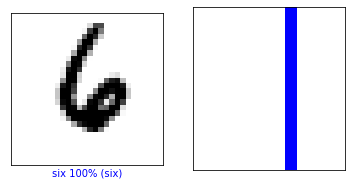

In [21]:
#Looking at the 0th image
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

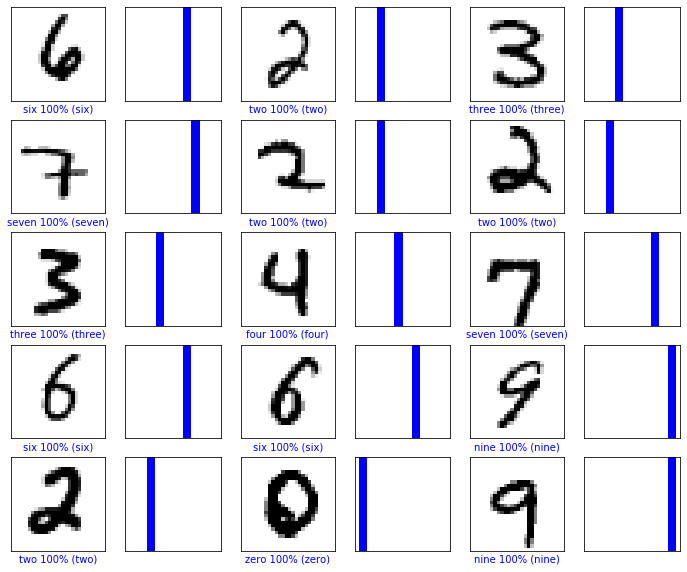

In [22]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [57]:
# predict results
results = model.predict(test_dataset)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("submission1.csv",index=False)

In [58]:
results.head()

0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int64

In [55]:
submission = pd.read_csv("submission1.csv")
submission.describe()

,ImageId,Label
count,28000.000000,10000.0
mean,14000.500000,1.0
std,8083.048105,0.0
min,1.000000,1.0
25%,7000.750000,1.0
50%,14000.500000,1.0
75%,21000.250000,1.0
max,28000.000000,1.0
